In [28]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load in the listings data
df=pd.read_csv('data/listings.csv')

In [36]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,per_night_price
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365,58.333333
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,1,340,2020-08-01,4.75,1,265,75.000000
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365,2.068966
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,14,1,2014-01-02,0.01,1,295,12.500000
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,65,2,473,2020-03-15,3.44,1,340,32.500000
5,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.89,1,0,37.500000
6,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,140,1,161,2019-07-29,1.21,4,274,140.000000
7,5552,Spacious river view in the West Village,8380,Maria,Manhattan,West Village,40.73552,-74.01042,Entire home/apt,160,3,66,2019-08-10,0.49,1,178,53.333333
8,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,88,4,180,2020-03-18,1.31,3,344,22.000000
9,6021,Wonderful Guest Bedroom in Manhattan CENTRAL PARK,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,123,2019-12-09,0.90,1,365,42.500000


####  Exercise 1: Create a bar chart and dataframe of top 10 Neigborhoods that have the most expensive listsings on average. 
Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods.
This is a little dubious - we assign "expensive" by calculating the average cost of 
an AirBnB in each neighborhood.

1. Make a dataframe that sorts the neighborhood field by decending price.  
1. Use head to cut back top the top 10
1. Use pandas.plot.barh to generate a histogram (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) wiki for details on pandas.plot.barh)
1. Display the data that you used to create the bar chart as a table with neighborhood and average price as the columns.  You want this to match the pivot that you create in youur dashboard

In [ ]:
# our goal is to make a chart reflecting the top 10 most expensive Neighborhoods
# This is a little dubious - we assign "expensive" by calculating the average cost of 
# an AirBnB in each neighborhood, then we take the top ten and weight each slice 
# by the average value.
#
# make a dataframe that sorts the neighborhood field by decending price.  
# Use head to cut back top the top 10. Then, use df.plot.barh to generate a histogram.

In [25]:
#df.head(5)
grouped = df                                                                    # Copy data frame
grouped['per_night_price'] = df['price'] / df['minimum_nights']                 # Create a new column called per_price_night to get a fair metric
grouped = df.groupby('neighbourhood')['per_night_price'].agg(['sum', 'mean'])   # Groupby and aggregate
grouped = grouped.reset_index()                                                 # Convert series back to df
grouped = grouped.sort_values(('mean'), ascending=False)                        # Sort
top_10_df = grouped.head(10)                                                    # Top 10 most expensive neighborhoods to book an airbnb

          neighbourhood            sum        mean
21         Breezy Point     686.000000  228.666667
73   Financial District  116235.539951  222.673448
75    Flatiron District   15905.356322  206.563069
102            Huguenot     180.000000  180.000000
175            Sea Gate    2119.928571  163.071429
128             Midtown  262966.421948  160.737422
198             Tribeca   31211.020333  159.239900
107     Jamaica Estates    3462.133333  157.369697
192    Theater District   50666.895721  144.762559
22            Briarwood    5198.450000  140.498649


In [26]:
# Now, display the top 10 datframe you created as a table with columns
# neighbourhood and price
print(top_10_df)

          neighbourhood            sum        mean
21         Breezy Point     686.000000  228.666667
73   Financial District  116235.539951  222.673448
75    Flatiron District   15905.356322  206.563069
102            Huguenot     180.000000  180.000000
175            Sea Gate    2119.928571  163.071429
128             Midtown  262966.421948  160.737422
198             Tribeca   31211.020333  159.239900
107     Jamaica Estates    3462.133333  157.369697
192    Theater District   50666.895721  144.762559
22            Briarwood    5198.450000  140.498649


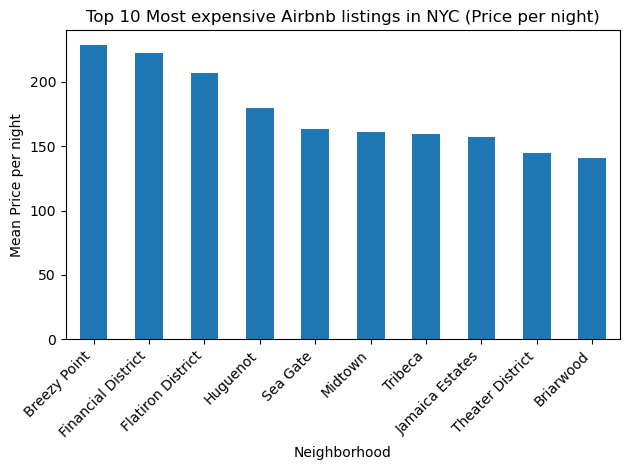

In [29]:
# Plotting the bar chart
top_10_df.plot.bar(x='neighbourhood', y='mean', legend=False)

# Adding labels and title
plt.title('Top 10 Most expensive Airbnb listings in NYC (Price per night)')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Price per night')

# Dispaly plot
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

####  Exercise 2: Create a bar chart and dataframe of top 10 Neigborhoods that have the LEAST expensive listsings on average. 

Do the same thing you just did, but get the 10 least expensive neighborhoods.  Sort them from lowest average price to highest.  Bew wure to provide a pivot table.

In [27]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.
reverse_sort_df = grouped = grouped.sort_values(('mean'), ascending=True)      
cheapest_10 = grouped.head(10)
print(cheapest_10)   

                  neighbourhood          sum       mean
9    Bay Terrace, Staten Island     1.833333   1.833333
89                   Grant City   145.654762  14.565476
125                     Melrose   151.061905  18.882738
141                New Brighton    78.616667  19.654167
85                     Glendale  1322.242857  23.197243
185              Spuyten Duyvil    71.704301  23.901434
221                    Woodside  8657.427822  25.166941
133                 Morris Park   551.857143  26.278912
42                   Co-op City    82.000000  27.333333
103                 Hunts Point   676.071429  28.169643


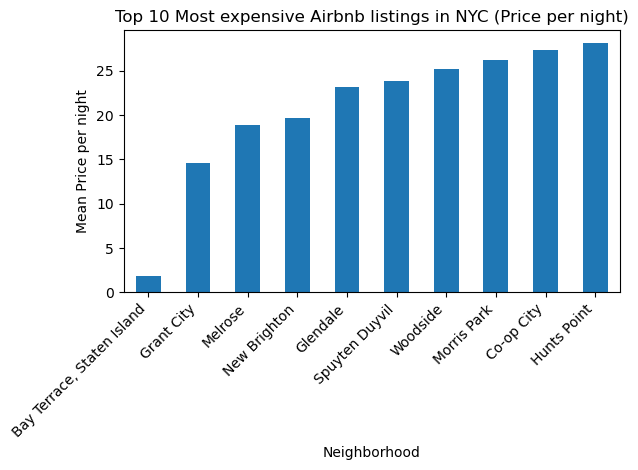

In [30]:
# we also would like to have the corresponding pivot table of the lowest 10
# Plotting the bar chart
cheapest_10.plot.bar(x='neighbourhood', y='mean', legend=False)

# Adding labels and title
plt.title('Top 10 Most expensive Airbnb listings in NYC (Price per night)')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Price per night')

# Dispaly plot
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [34]:
# Save new df 
standardized_df = df                                                                    # Copy data frame
standardized_df['per_night_price'] = df['price'] / df['minimum_nights']                 # Create a new column called per_price_night to get a fair metric
standardized_df = standardized_df.groupby('neighbourhood')['per_night_price'].agg(['sum', 'mean'])   # Groupby and aggregate
standardized_df = standardized_df.reset_index()                                                 # Convert series back to df
standardized_df = standardized_df.sort_values(('mean'), ascending=False)   

#standardized_df.to_csv('./data/fixed_listings.csv', index=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,per_night_price
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365,58.333333
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,1,340,2020-08-01,4.75,1,265,75.000000
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365,2.068966
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,14,1,2014-01-02,0.01,1,295,12.500000
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,65,2,473,2020-03-15,3.44,1,340,32.500000
5,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.89,1,0,37.500000
6,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,140,1,161,2019-07-29,1.21,4,274,140.000000
7,5552,Spacious river view in the West Village,8380,Maria,Manhattan,West Village,40.73552,-74.01042,Entire home/apt,160,3,66,2019-08-10,0.49,1,178,53.333333
8,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,88,4,180,2020-03-18,1.31,3,344,22.000000
9,6021,Wonderful Guest Bedroom in Manhattan CENTRAL PARK,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,123,2019-12-09,0.90,1,365,42.500000


#  Now make all four widgets (the two charts and the two dataframes) in a Tableau dashboard!

Tableau Dashboard Link: https://us-east-1.online.tableau.com/#/site/loydflores49-6073e39b78/workbooks/1777852/views
